# HW3

## Decision Trees

# Rishi Kiran Munuswamy

Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. Let's check that Python 3.5 or later is installed, as well as Scikit-Learn ≥0.20.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Part 0

- Run and check the outputs.

### Confusion matrix plot

In [4]:
# Show confusion matrix
def plot_confusion_matrix(confusion_mat, cln):
    plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.gray)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(cln)
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

### Confusion matrix simple example 1

[[2 1 0 0]
 [0 2 0 0]
 [0 0 1 0]
 [0 1 0 2]]


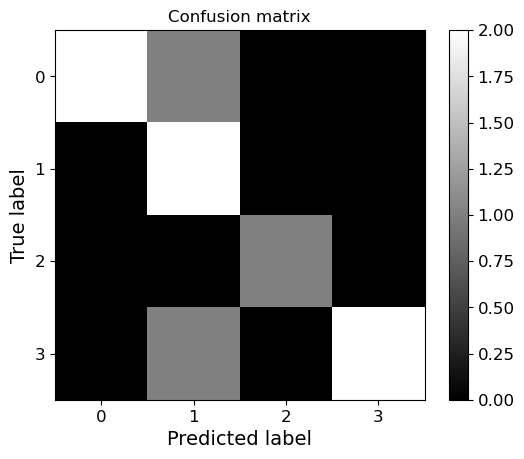

In [7]:
y_true = [1, 0, 0, 2, 1, 0, 3, 3, 3]
y_pred = [1, 1, 0, 2, 1, 0, 1, 3, 3]
confusion_mat = confusion_matrix(y_true, y_pred)

print(confusion_mat)
plot_confusion_matrix(confusion_mat, 4)

In [9]:
# Print classification report
target_names = ['Class-0', 'Class-1', 'Class-2', 'Class-3']

result_metrics = classification_report(y_true, y_pred, target_names=target_names)

print(result_metrics)

              precision    recall  f1-score   support

     Class-0       1.00      0.67      0.80         3
     Class-1       0.50      1.00      0.67         2
     Class-2       1.00      1.00      1.00         1
     Class-3       1.00      0.67      0.80         3

    accuracy                           0.78         9
   macro avg       0.88      0.83      0.82         9
weighted avg       0.89      0.78      0.79         9



### Confusion matrix simple example 2

[[2 2]
 [0 5]]


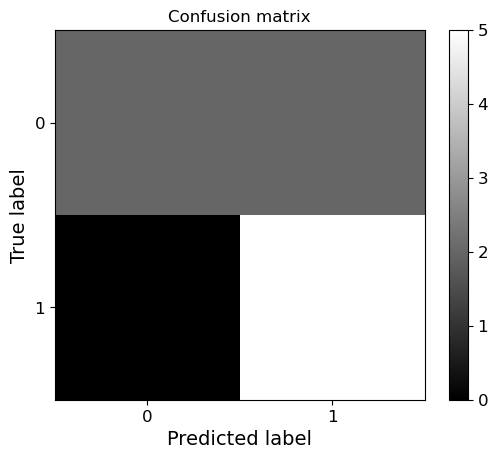

In [13]:
y_true2 = [1, 0, 0, 1, 1, 0, 1, 1, 0]
y_pred2 = [1, 1, 0, 1, 1, 0, 1, 1, 1]
confusion_mat2 = confusion_matrix(y_true2, y_pred2)

print(confusion_mat2)
plot_confusion_matrix(confusion_mat2, 2)

In [15]:
# Print classification report
target_names2 = ['Class-0', 'Class-1']

result_metrics = classification_report(y_true2, y_pred2, target_names=target_names2)

print(result_metrics)

              precision    recall  f1-score   support

     Class-0       1.00      0.50      0.67         4
     Class-1       0.71      1.00      0.83         5

    accuracy                           0.78         9
   macro avg       0.86      0.75      0.75         9
weighted avg       0.84      0.78      0.76         9



## Data Visualization

### iris dataset before we start training and testing a model
#### use pandas  pd.plotting.scatter_matrix

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Ir

C:\Users\deena\AppData\Local\Temp\ipykernel_28016\565035462.py:19: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  _ = pd.plotting.scatter_matrix(iris_df[[c for c in iris_df.columns if c != 'y']], ax=ax)


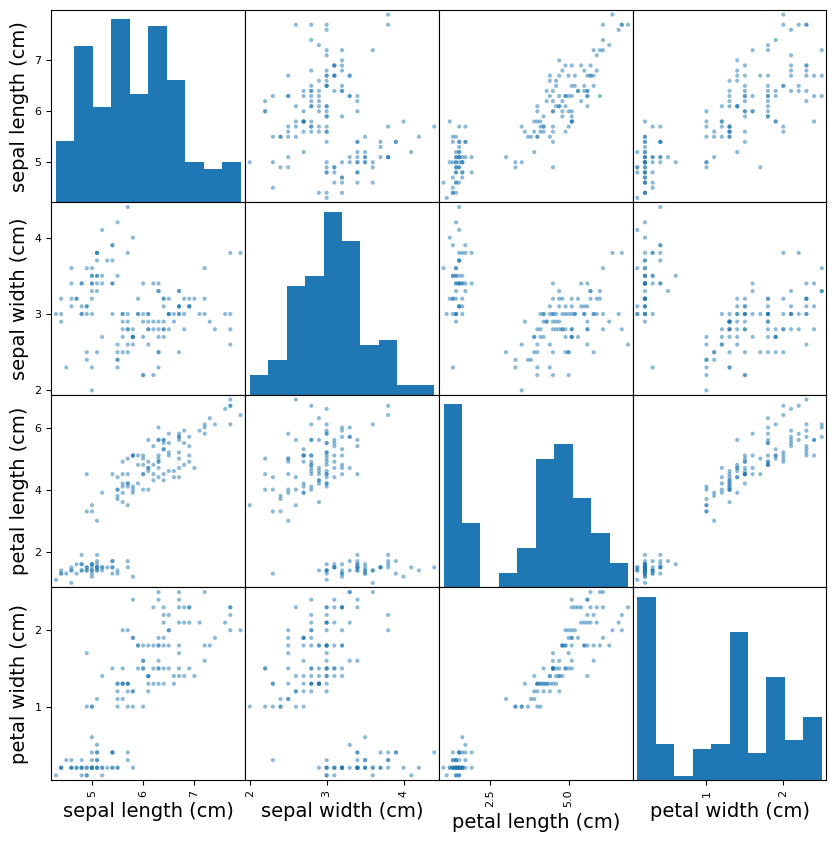

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# read data from CSV file to dataframe
iris = pd.read_csv('iris.csv')
print(iris.head())
print(iris.tail())
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
# Load some data
iris = datasets.load_iris()
print(iris['feature_names'])
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

# scatter matrix plot
fig, ax = plt.subplots(figsize=(10,10), dpi=100)

_ = pd.plotting.scatter_matrix(iris_df[[c for c in iris_df.columns if c != 'y']], ax=ax)
_ = ax.set_title('Scatter matrix')
plt.show()



# Decision Trees

### Load data

- For the following code, we use sklearn.datasets package for loading a dataset instead of reading a data file stored on a local machine.

In [21]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
#print(iris)

### Split the data to training and testing

In [24]:
X = iris.data[:, 2:] # petal length and width
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Training
### Learing using training data

- use Gini index measure

*** Notes: you can also use gain information (entropy) measure by setting criterion="entropy" in the model

In [27]:
tree_clf = DecisionTreeClassifier(max_depth=2, criterion="gini", random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

## Testing
### Evaluating the model using testing data

In [30]:
y_pred = tree_clf.predict(X_test)

# Visualization

## Confusion matrix

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


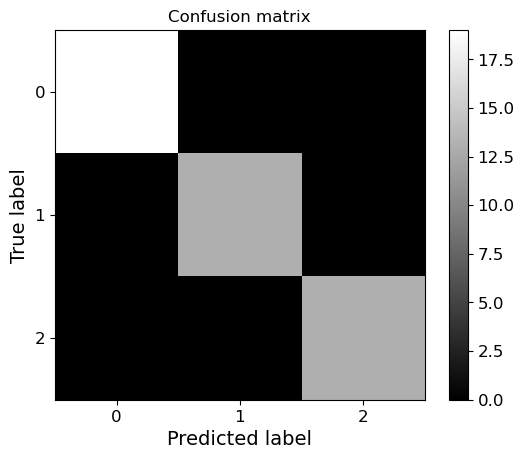

In [34]:
# plot a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

print(confusion_mat)

plot_confusion_matrix(confusion_mat, 3)

### Model performance summary

In [37]:
# Print classification report
target_names = iris.target_names

result_metrics = classification_report(y_test, y_pred, target_names=target_names)

print(result_metrics)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [39]:
# you can access each class's metrics from result_metrics
result_metrics_dict = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)

print(result_metrics_dict['setosa']['precision'])

1.0


### Draw a decision tree
notice that using graphviz is not the only method to draw decision tree.  You can also use  sklearn.tree.plot_tree

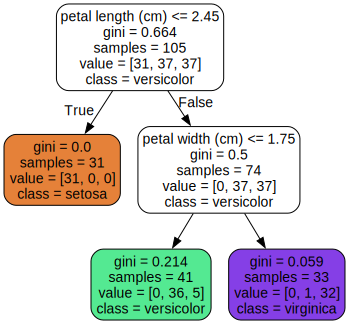

In [42]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

## k-Cross Validation

- using sklearn corss_val_score() function

In [45]:
from sklearn.model_selection import cross_val_score

cross_val_score(tree_clf, iris.data, iris.target, cv=3)

array([0.96, 0.92, 0.92])

## k-Cross Validation

- using KFold function with freedom

In [48]:
from sklearn.model_selection import KFold # import k-fold validation

kf = KFold(n_splits=3, random_state=None, shuffle=True) # Define the split - into 2 folds

kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

print(kf)


KFold(n_splits=3, random_state=None, shuffle=True)


### Applying k-Cross Validation

In [51]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tree_clf.fit(X_train, y_train)

    y_pred = tree_clf.predict(X_test)

    # Print classification report
    target_names = iris.target_names
    print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        21
  versicolor       1.00      0.92      0.96        12
   virginica       0.94      1.00      0.97        17

    accuracy                           0.98        50
   macro avg       0.98      0.97      0.98        50
weighted avg       0.98      0.98      0.98        50

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.87      1.00      0.93        20
   virginica       1.00      0.79      0.88        14

    accuracy                           0.94        50
   macro avg       0.96      0.93      0.94        50
weighted avg       0.95      0.94      0.94        50

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.89      0.94      0.92        18
   virginica       0.94      0.89      0.92        19

    accuracy        

# Decision Tree boundary Visualization

In [54]:
## Example  This function is meant to be used for other data besides iris.

Saving figure decision_tree_decision_boundaries_plot


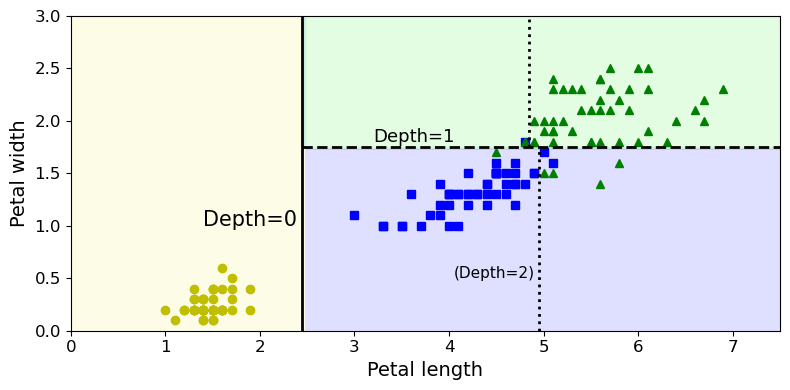

In [56]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)       # Return evenly spaced numbers over a specified interval.
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

# Predicting classes and class probabilities

In [59]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.91428571, 0.08571429]])

In [61]:
tree_clf.predict([[5, 1.5]])

array([1])

# Sensitivity to training set details

In [64]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # widest Iris versicolor flower


array([[4.8, 1.8]])

In [66]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(max_depth=2, random_state=40)

Saving figure decision_tree_instability_plot


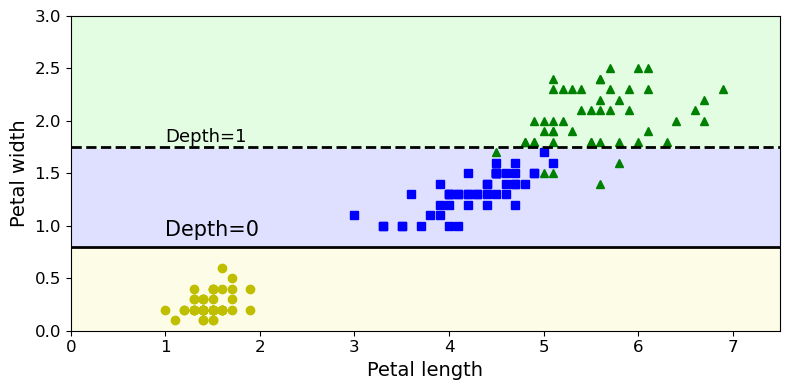

In [68]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

save_fig("decision_tree_instability_plot")
plt.show()

# =========  HW3 =============

##  ===============================

## Construct decision trees

#### 1. Construct  a decision tree using the following parameters

- Use information gain (entropy) measure
- Apply k=10 cross validation and print a summary of statistics (performance evaluation) for each fold


#### 2. Compare the performance results with those of the decision tree using Gini index measure in the above example

#### 3. For both trees, change the following parameters and observe the changes:

- The depth of tree: currently max_depth=2 in the model training step. Change the depth 3, 4, 5 and check if this affects the overall results.

- The k value for cross validation is currently set to 3. Change k value, k = 5, 7, 10 and check if this affects the overall results.

In [224]:
# Import the data, classifier, and metrics libraries similar to what we did above
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from graphviz import Source
from matplotlib.colors import ListedColormap

# load iris dataset and confirm data has been loaded by printing first few lines
iris = load_iris()
X = iris.data[:, 2:]
y = iris.target
print(iris)





{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [226]:
# Split data into testing and training - same as code above
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [228]:
# Create decision tree and set criterion to information gain (entropy)
tree_clf_entropy = DecisionTreeClassifier(max_depth=2, criterion="entropy", random_state=42)
tree_clf_entropy.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

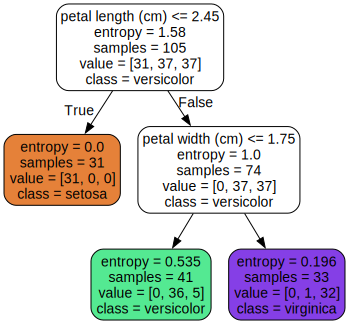

In [230]:
# Visualize the new tree that you constructed  using graphviz

import os  # Import the os module
from graphviz import Source
from sklearn.tree import export_graphviz

# Define or import IMAGES_PATH if not already defined
# This path should lead to the directory where you want to save the visualization
IMAGES_PATH = os.path.join(".", "images", "decision_trees")
# Replace with the actual path if necessary

os.makedirs(IMAGES_PATH, exist_ok=True) # Make sure the directory exists


export_graphviz(
        tree_clf_entropy,  # Changed tree_clf to tree_clf_entropy
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

### Cross-validation:

In [233]:
# Apply 10-fold cross validation score
kf_10 = KFold(n_splits=10, random_state=42, shuffle=True)
cross_val_scores = cross_val_score(tree_clf_entropy, X, y, cv=kf_10)
print("10-fold cross-validation scores:", cross_val_scores)
print("Mean accuracy:", np.mean(cross_val_scores))

10-fold cross-validation scores: [1.         1.         1.         0.93333333 1.         0.86666667
 0.86666667 1.         0.93333333 0.86666667]
Mean accuracy: 0.9466666666666667


In [90]:
# Parse and bin the data into   10 folds for validation
    # import k-fold validation 
    # Define the split - into 10 folds
    # returns the number of splitting iterations in the cross-validator
from sklearn.model_selection import KFold 

kf = KFold(n_splits=10, random_state=None, shuffle=True)

kf.get_n_splits(X) 

print(kf)


KFold(n_splits=10, random_state=None, shuffle=True)


In [145]:
# Apply the 10-fold cross validation we've created
import numpy as np 
from sklearn.metrics import classification_report 

tree_clf = DecisionTreeClassifier(max_depth=2,criterion="entropy", random_state=42)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tree_clf.fit(X_train, y_train)

    y_pred = tree_clf.predict(X_test)

    labels = np.unique(np.concatenate((y_test, y_pred)))
    target_names_filtered = [iris.target_names[i] for i in labels]

    print(classification_report(y_test, y_pred, labels=labels, target_names=target_names_filtered))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       1.00      1.00      1.00         6
   virginica       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         4
  versicolor       1.00      0.57      0.73         7
   virginica       0.57      1.00      0.73         4

    accuracy                           0.80        15
   macro avg       0.86      0.86      0.82        15
weighted avg       0.89      0.80      0.80        15

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         5
  versicolor       0.80      1.00      0.89         4
   virginica       1.00      0.83      0.91         6

    accuracy        

Saving figure decision_tree_decision_boundaries_plot


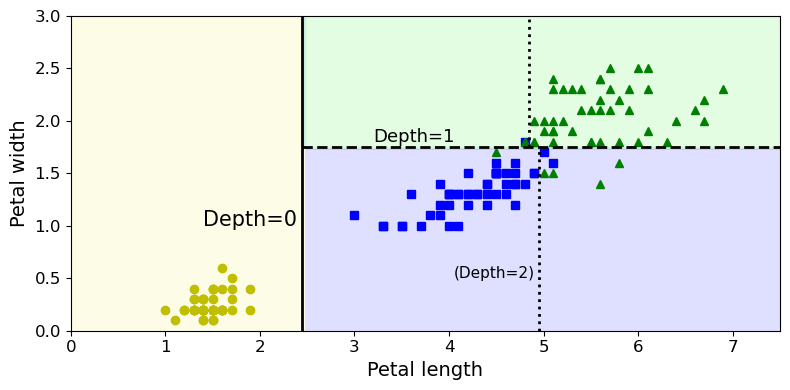

In [174]:
# Plot the decision boundry graph for the entropy model
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt 
import os 
import matplotlib as mpl 
import numpy as np


def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100) 
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    PROJECT_ROOT_DIR = "." 
    CHAPTER_ID = "decision_trees" 
    IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
    os.makedirs(IMAGES_PATH, exist_ok=True)
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

### explain what is the relationship between the drawn decision bondries and gini index

##### The decision boundaries in the plot show how the tree splits the data into different regions based on feature values. The Gini index measures how pure each split is, lower Gini means better separation of classes. As the tree depth increases, it creates more splits, leading to more detailed and specific decision boundaries.

In [162]:
# Change the depth of the decision tree to 3, 4, and  5

# Changing depth to 3
tree_clf_gini_3 = DecisionTreeClassifier(max_depth=3, criterion="gini", random_state=42)
tree_clf_gini_3.fit(X_train, y_train)

tree_clf_entropy_3 = DecisionTreeClassifier(max_depth=3, criterion="entropy", random_state=42)
tree_clf_entropy_3.fit(X_train, y_train)

# Changing depth to 4
tree_clf_gini_4 = DecisionTreeClassifier(max_depth=4, criterion="gini", random_state=42)
tree_clf_gini_4.fit(X_train, y_train)

tree_clf_entropy_4 = DecisionTreeClassifier(max_depth=4, criterion="entropy", random_state=42)
tree_clf_entropy_4.fit(X_train, y_train)

# Changing depth to 5
tree_clf_gini_5 = DecisionTreeClassifier(max_depth=5, criterion="gini", random_state=42)
tree_clf_gini_5.fit(X_train, y_train)

tree_clf_entropy_5 = DecisionTreeClassifier(max_depth=5, criterion="entropy", random_state=42)
tree_clf_entropy_5.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

### Creating 5 fold cv and validating trees with depth 3

In [222]:
# Create the 5 fold cv
kf_5 = KFold(n_splits=5, random_state=None, shuffle=True) 

kf_5.get_n_splits(X)

# Validate output on the tree with depth 3
print('\nFOR GINI\n')

for train_index, test_index in kf_5.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tree_clf_gini_3.fit(X_train, y_train)

    y_pred_5 = tree_clf_gini_3.predict(X_test)

    target_names = iris.target_names
    print(classification_report(y_test, y_pred_5, target_names=target_names))
print('\nFOR ENTROPY\n')

for train_index, test_index in kf_5.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tree_clf_entropy_3.fit(X_train, y_train)

    y_pred_en_5 = tree_clf_entropy_3.predict(X_test)

    target_names = iris.target_names
    print(classification_report(y_test, y_pred_en_5, target_names=target_names))


FOR GINI

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.89      1.00      0.94         8
   virginica       1.00      0.93      0.96        14

    accuracy                           0.97        30
   macro avg       0.96      0.98      0.97        30
weighted avg       0.97      0.97      0.97        30

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accur

### Creating 7 folds and validating output on trees with depth 4

In [220]:
# Create the 7 fold cv
kf_7 = KFold(n_splits=7, random_state=None, shuffle=True) # Define the split - into 7 folds

kf_7.get_n_splits(X)

# Validate output on the tree with depth 4
print('\nFOR GINI\n')

for train_index, test_index in kf_7.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tree_clf_gini_4.fit(X_train, y_train)

    y_pred_7 = tree_clf_gini_4.predict(X_test)

    target_names = iris.target_names
    print(classification_report(y_test, y_pred_7, target_names=target_names))
print('\nFOR ENTROPY\n')

for train_index, test_index in kf_7.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tree_clf_entropy_4.fit(X_train, y_train)

    y_pred_en_7 = tree_clf_entropy_4.predict(X_test)

    target_names = iris.target_names
    print(classification_report(y_test, y_pred_en_7, target_names=target_names))


FOR GINI

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00         6
   virginica       1.00      1.00      1.00         5

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         2
  versicolor       1.00      0.91      0.95        11
   virginica       0.90      1.00      0.95         9

    accuracy                           0.95        22
   macro avg       0.97      0.97      0.97        22
weighted avg       0.96      0.95      0.95        22

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.78      1.00      0.88         7
   virginica       1.00      0.71      0.83         7

    accur

### Create the 10 fold and Validating output on the tree with depth 5


In [218]:
# Create the 10 fold cv
kf_10 = KFold(n_splits=10, random_state=None, shuffle=True)

kf_10.get_n_splits(X)

# Validate output on the tree with depth 5
print('\nFOR GINI\n')

for train_index, test_index in kf_10.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tree_clf_gini_5.fit(X_train, y_train)

    y_pred_10 = tree_clf_gini_5.predict(X_test)

    target_names = iris.target_names
    print(classification_report(y_test, y_pred_10, target_names=target_names))
print('\nFOR ENTROPY\n')

for train_index, test_index in kf_10.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tree_clf_entropy_5.fit(X_train, y_train)

    y_pred_en_10 = tree_clf_entropy_5.predict(X_test)

    classes = np.unique(y_pred_en_10)

    target_names = iris.target_names
    print(classification_report(y_test, y_pred_en_10, target_names=target_names))


FOR GINI

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         4
  versicolor       0.80      1.00      0.89         4
   virginica       1.00      0.86      0.92         7

    accuracy                           0.93        15
   macro avg       0.93      0.95      0.94        15
weighted avg       0.95      0.93      0.93        15

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       1.00      0.67      0.80         3
   virginica       0.86      1.00      0.92         6

    accuracy                           0.93        15
   macro avg       0.95      0.89      0.91        15
weighted avg       0.94      0.93      0.93        15

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         4
  versicolor       1.00      1.00      1.00         6
   virginica       1.00      1.00      1.00         5

    accur

## Graph for Depth 3: Gini and Entropy

#### Show  decision boundary graphs  for depths 3, 4, and 5

Saving figure decision_tree_decision_boundaries_plot_depth3


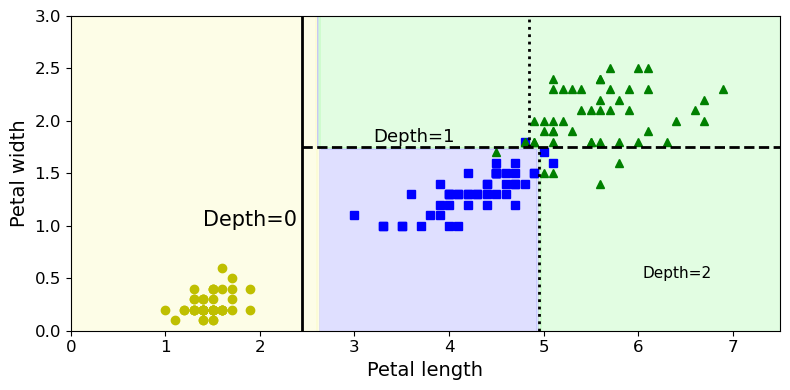

In [206]:

from matplotlib.colors import ListedColormap
def plot_decision_boundary(tree_clf_gini_3, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)  
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred_graph_gini_3 = tree_clf_gini_3.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred_graph_gini_3, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred_graph_gini_3, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_gini_3, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(6.05, 0.5, "Depth=2", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot_depth3")
plt.show()

Saving figure decision_tree_decision_boundaries_plot_depth3_entropy


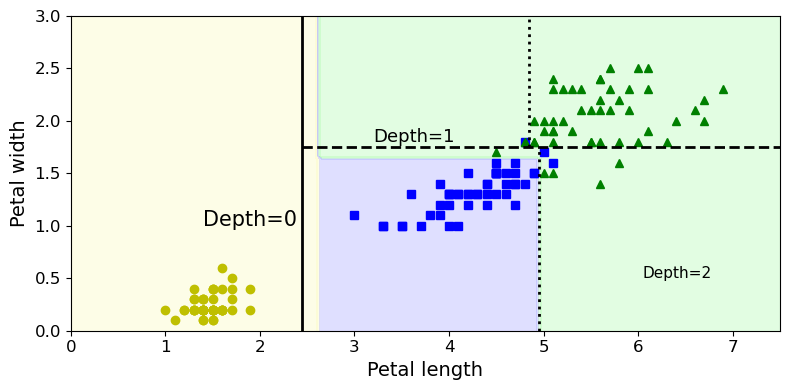

In [204]:
def plot_decision_boundary(tree_clf_entropy_3, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred_graph_entropy_3 = tree_clf_entropy_3.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred_graph_entropy_3, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred_graph_entropy_3, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_entropy_3, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(6.05, 0.5, "Depth=2", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot_depth3_entropy")
plt.show()

### Graph for depth 4: Gini and Entropy

Saving figure decision_tree_decision_boundaries_plot_depth4_gini


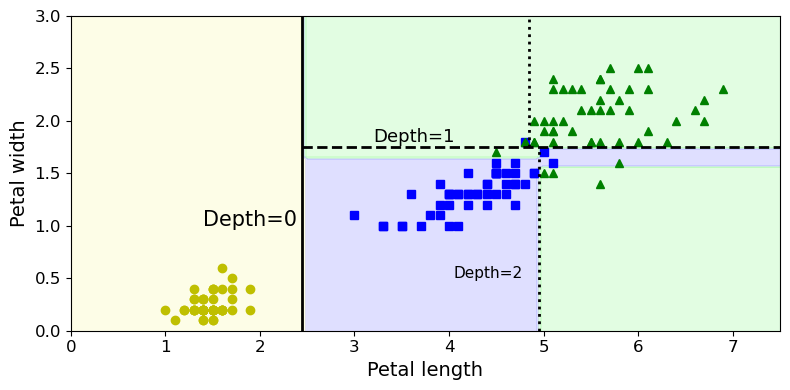

In [193]:
def plot_decision_boundary(tree_clf_gini_4, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred_graph_gini_4 = tree_clf_gini_4.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred_graph_gini_4, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred_graph_gini_4, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_gini_4, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "Depth=2", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot_depth4_gini")
plt.show()

Saving figure decision_tree_decision_boundaries_plot


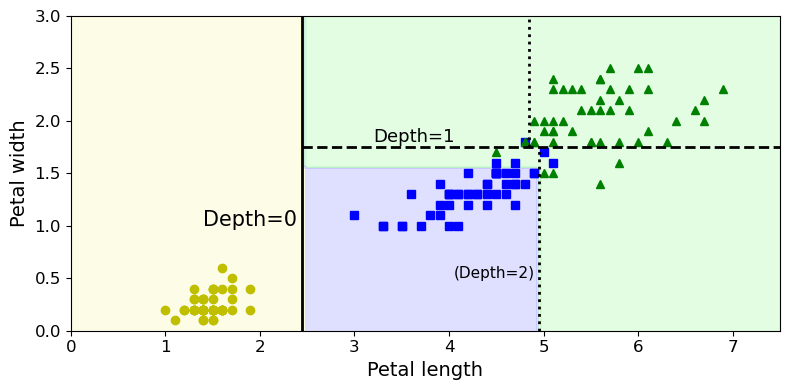

In [199]:
def plot_decision_boundary(tree_clf_entropy_4, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)   
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred_graph_entropy_4 = tree_clf_entropy_4.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred_graph_entropy_4, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred_graph_entropy_4, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_entropy_4, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

### Graph for Depth 5: Gini And Entropy Respectively

Saving figure decision_tree_decision_boundaries_plot


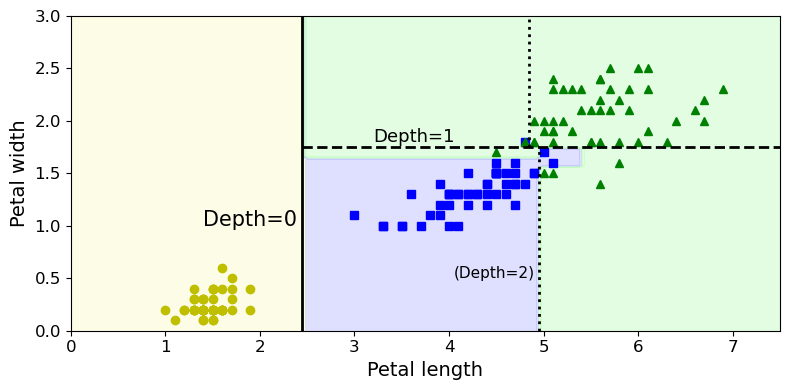

In [195]:
def plot_decision_boundary(tree_clf_gini_5, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)       
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred_graph_gini_5 = tree_clf_gini_5.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred_graph_gini_5, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred_graph_gini_5, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_gini_5, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

Saving figure decision_tree_decision_boundaries_plot


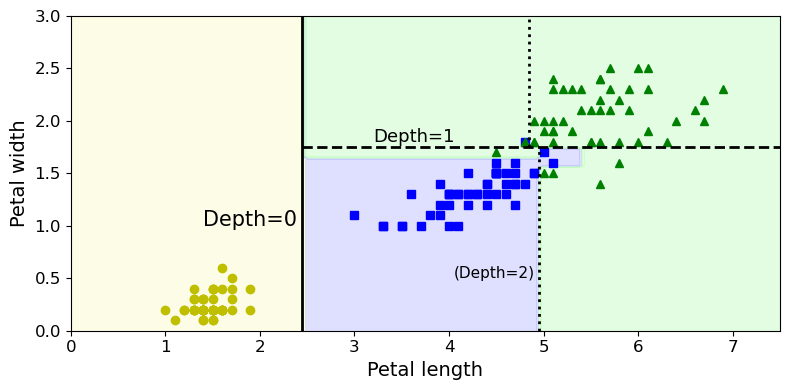

In [197]:
def plot_decision_boundary(tree_clf_entropy_5, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)      
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred_graph_entropy_5 = tree_clf_entropy_5.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred_graph_entropy_5, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred_graph_entropy_5, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_entropy_5, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

### Conclusion



The model accuracy increases as the decision tree depth increases because it becomes better at detecting complex data patterns. The deeper the tree grows the more likely it becomes to overfit since it begins to learn random noise rather than recognizing meaningful patterns. The inappropriate memorization of data noise results in insufficient generalization capability when predicting new data cases. K-fold cross-validation becomes more computationally demanding when practitioners increase the number of folds as it reduces bias yet results in higher computational expenses. When using k=10 there will be substantial delays in training duration due to the increased number of folds. High amounts of cross-validation create overfitting problems in small datasets because the model starts to focus on insignificant training data patterns. A combination of depth = 3 and k = 5 proved to deliver optimal outcomes in terms of both model accuracy alongside generalization capabilities.  

Class imbalance became a challenge because some of the folds contained uneven data distributions which impacted performance evaluation. The process of debugging model inconsistencies demanded precise parameter adjustment because small adjustments led to surprising unexpected variations in the results. Interpreting decision boundaries proved difficult because Entropy and Gini distinctions remained unclear to direct view. The process of executing and managing several cross-validation runs required extended durations because of lengthened computational times.